In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

In [3]:
country = "benin"  
data_path = r"C:\Users\HP\Desktop\solar-challenge-week0\data\benin-malanville.csv"

df = pd.read_csv(data_path)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [4]:
# Summary statistics
print(df.describe())

# Check for missing values
missing = df.isna().sum()
print(missing[missing>0])

# Percentage of missing values
print((df.isna().sum()/len(df))*100)

                           Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-02-07 12:00:30.000000512     240.559452     167.187516   
min              2021-08-09 00:01:00     -12.900000      -7.800000   
25%              2021-11-08 06:00:45      -2.000000      -0.500000   
50%              2022-02-07 12:00:30       1.800000      -0.100000   
75%              2022-05-09 18:00:15     483.400000     314.200000   
max              2022-08-09 00:00:00    1413.000000     952.300000   
std                              NaN     331.131327     261.710501   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      115.358961     236.589496     228.883576      28.179683   
min       -12.600000       0.000000       0.000000      11.000000   
25%        -2.100000       0.000000       0.000000      24.200000   
50%         1.600000    

In [5]:
high_nulls = (df.isna().mean() * 100)[(df.isna().mean() * 100) > 5]
print("Columns with >5% missing values:\n", high_nulls)

Columns with >5% missing values:
 Comments    100.0
dtype: float64


In [6]:
# Columns to check
numeric_cols = ['GHI','DNI','DHI','ModA','ModB','WS','WSgust']

# Compute Z-scores
z_scores = np.abs(stats.zscore(df[numeric_cols]))
outliers = (z_scores > 3).any(axis=1)

print(f"Outliers detected: {outliers.sum()} rows")


Outliers detected: 7740 rows


In [7]:

# Remove outliers
df_clean = df[~outliers].copy()

# Impute missing values (median)
df_clean[numeric_cols] = df_clean[numeric_cols].fillna(df_clean[numeric_cols].median())

df_clean.to_csv(r"C:\Users\HP\Desktop\solar-challenge-week0\data\benin-malanville_clean.csv", index=False)


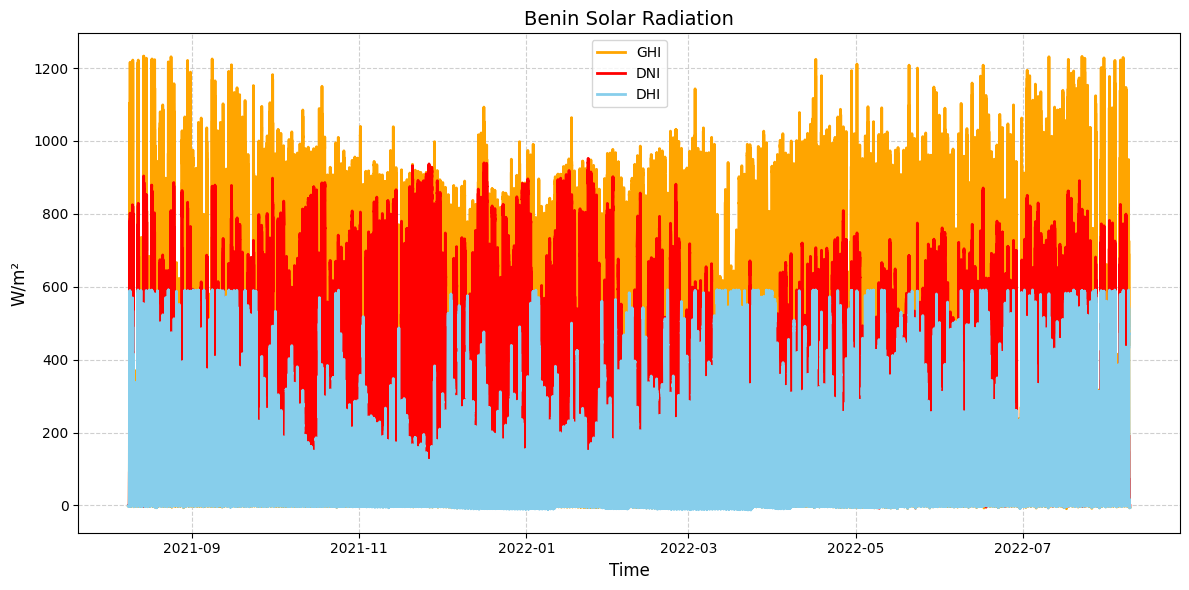

In [9]:
plt.figure(figsize=(12, 6))

# Custom colors
plt.plot(df_clean['Timestamp'], df_clean['GHI'], label='GHI', color='orange', linewidth=2)
plt.plot(df_clean['Timestamp'], df_clean['DNI'], label='DNI', color='red', linewidth=2)
plt.plot(df_clean['Timestamp'], df_clean['DHI'], label='DHI', color='skyblue', linewidth=2)

plt.legend()
plt.title(f"{country.capitalize()} Solar Radiation", fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.ylabel("W/m²", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


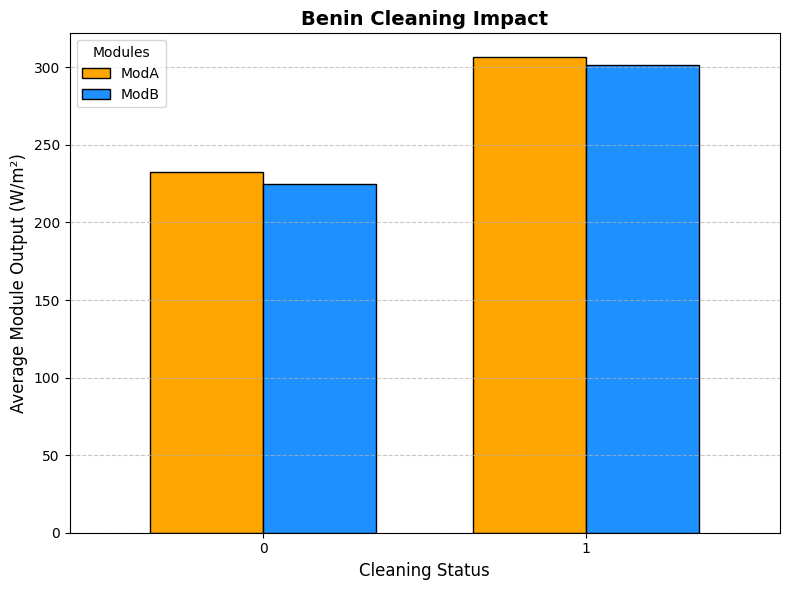

In [10]:
# Compute cleaning effect
cleaning_effect = df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean()

# Plot with custom colors and style
ax = cleaning_effect.plot(
    kind='bar',
    figsize=(8, 6),
    color=['#FFA500', '#1E90FF'],  # Orange for ModA, Blue for ModB
    edgecolor='black',
    width=0.7
)

plt.title(f"{country.capitalize()} Cleaning Impact", fontsize=14, fontweight='bold')
plt.xlabel("Cleaning Status", fontsize=12)
plt.ylabel("Average Module Output (W/m²)", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Modules", fontsize=10)
plt.tight_layout()
plt.show()


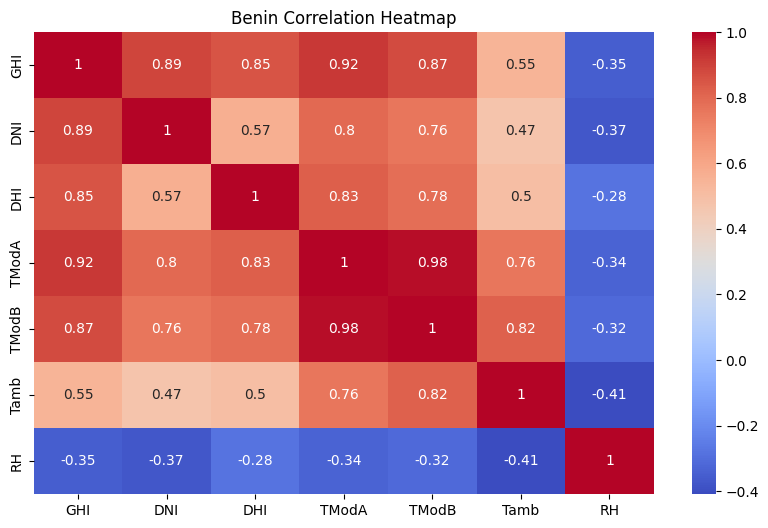

In [14]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_clean[['GHI','DNI','DHI','TModA','TModB','Tamb','RH']].corr(), annot=True, cmap='coolwarm')
plt.title(f"{country.capitalize()} Correlation Heatmap")
plt.show()

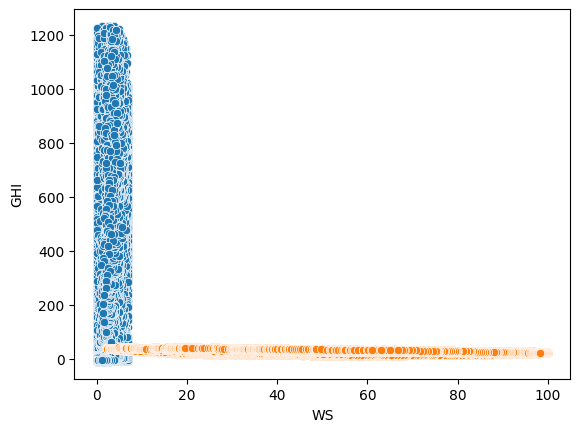

In [13]:
# Scatter plots
sns.scatterplot(data=df_clean, x='WS', y='GHI')
sns.scatterplot(data=df_clean, x='RH', y='Tamb')
plt.show()

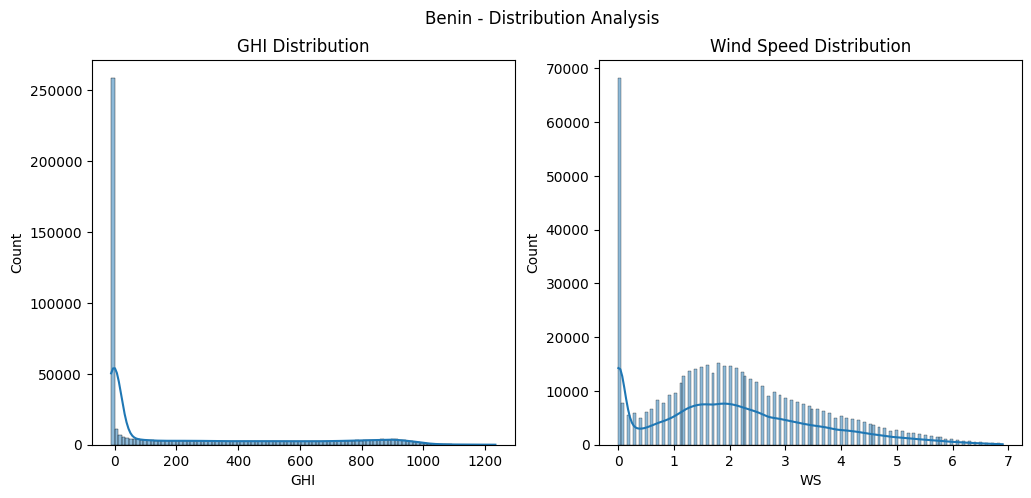

In [15]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.histplot(df_clean['GHI'], kde=True, ax=ax[0])
ax[0].set_title("GHI Distribution")
sns.histplot(df_clean['WS'], kde=True, ax=ax[1])
ax[1].set_title("Wind Speed Distribution")
plt.suptitle(f"{country.capitalize()} - Distribution Analysis")
plt.show()

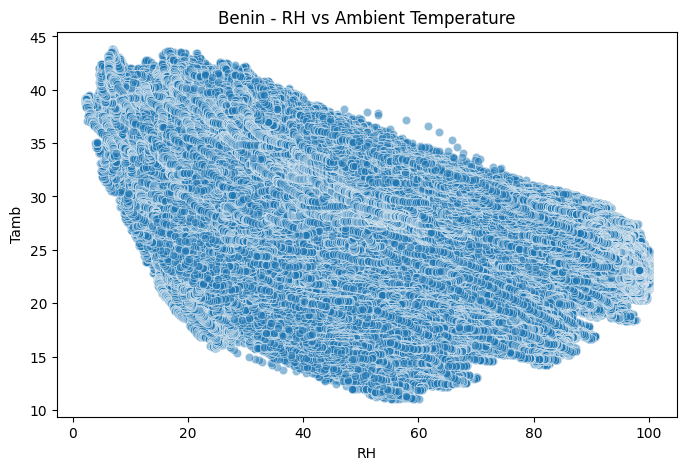

In [16]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_clean, x='RH', y='Tamb', alpha=0.5)
plt.title(f"{country.capitalize()} - RH vs Ambient Temperature")
plt.show()

In [17]:

correlation = df_clean['RH'].corr(df_clean['Tamb'])
print(f"Correlation between RH and Tamb: {correlation:.3f}")

Correlation between RH and Tamb: -0.410


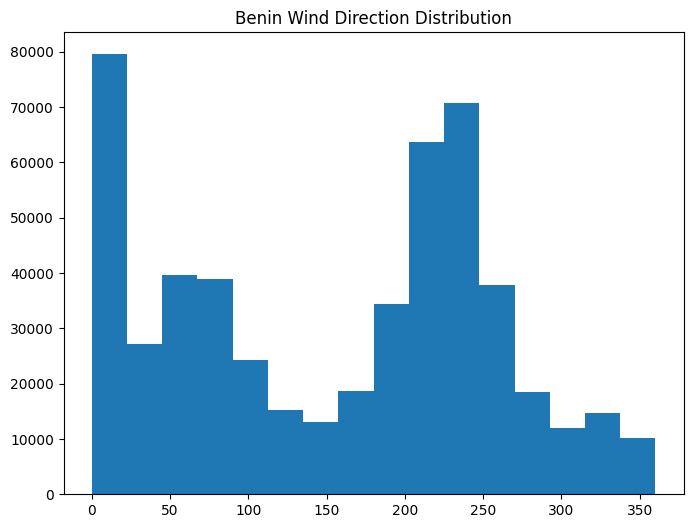

In [18]:
# Wind rose (simplified)
plt.figure(figsize=(8,6))
plt.hist(df_clean['WD'], bins=16)
plt.title(f"{country.capitalize()} Wind Direction Distribution")
plt.show()

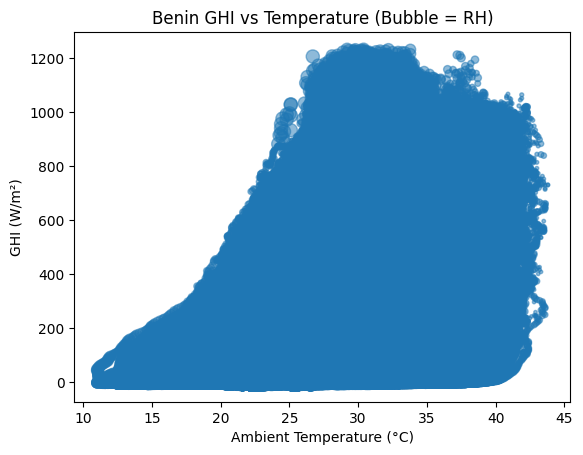

In [19]:

# Solar radiation vs. temperature
plt.scatter(df_clean['Tamb'], df_clean['GHI'], s=df_clean['RH'], alpha=0.5)
plt.xlabel("Ambient Temperature (°C)")
plt.ylabel("GHI (W/m²)")
plt.title(f"{country.capitalize()} GHI vs Temperature (Bubble = RH)")
plt.show()

In [21]:
print(f"""
🔍 {country.capitalize()} Dataset Summary:
- Total Records: {len(df)}
- Cleaned Records: {len(df_clean)}
- Missing Values Fixed: {missing.sum()}
- Outliers Removed: {outliers.sum()}
- Correlation (RH vs Tamb): {correlation:.2f}

✅ Data ready for modeling and region comparison.
""")


🔍 Benin Dataset Summary:
- Total Records: 525600
- Cleaned Records: 517860
- Missing Values Fixed: 525600
- Outliers Removed: 7740
- Correlation (RH vs Tamb): -0.41

✅ Data ready for modeling and region comparison.

